In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [138]:
#url to datasets:
url_labor_part_ur_rate = 'https://raw.githubusercontent.com/zl2940/Covid_Project/main/Labor%20Shortage/dataset_AIP/Labor%20Participation%20and%20Unemployment%20Rate%20-%20Demography.csv'
url_employment_level_demo = 'https://raw.githubusercontent.com/zl2940/Covid_Project/main/Labor%20Shortage/dataset_AIP/Labor%20Force%20and%20Employment%20Level.csv'
url_empoyment_level_industry = 'https://raw.githubusercontent.com/zl2940/Covid_Project/main/Labor%20Shortage/dataset_AIP/Employment%20Level%20-%20Industry.csv'
url_ur_industry = 'https://raw.githubusercontent.com/zl2940/Covid_Project/main/Labor%20Shortage/dataset_AIP/UR%20-%20Industry.csv'


In [156]:
plt.rcParams.update(plt.rcParamsDefault)


Labor Force Participation Rate    2020-04-01
dtype: object
Labor Force Participation Rate    60.2
dtype: float64


<ipython-input-157-8a18cedb331f>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1_other = df1.drop('Labor Force Participation Rate', 1)


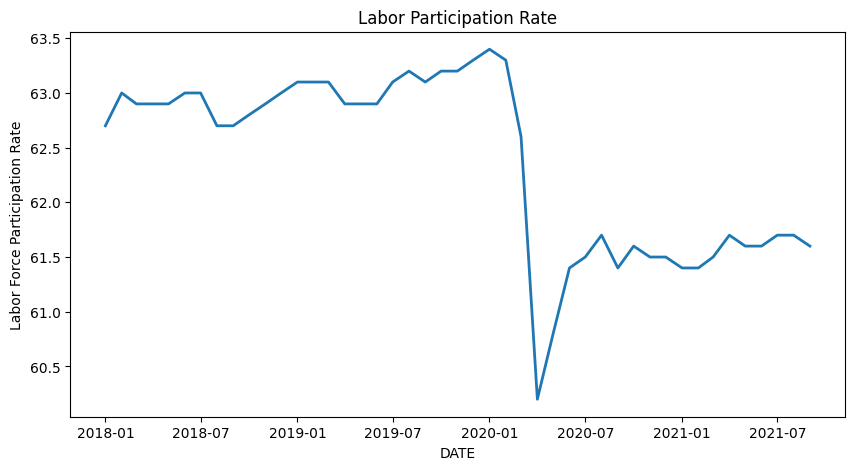

In [157]:
#Figure 2: Labor Participation Rate:
df1 = pd.read_csv(url_labor_part_ur_rate)
df1['DATE'] = pd.to_datetime(df1['DATE']).dt.date
df1 = df1.set_index("DATE")
#split the dataset to two parts: labor participation and other because LP is too large, hard to visualize
df1_par = df1[['Labor Force Participation Rate']]
df1_other = df1.drop('Labor Force Participation Rate', 1)

plt.rcParams['figure.figsize'] = (10,5)
#plt.style.use('fivethirtyeight')
ax = df1_par['Labor Force Participation Rate'].plot(linewidth = 2, fontsize = 10, title = 'Labor Participation Rate')
ax.set_ylabel('Labor Force Participation Rate')
print(df1_par.idxmin())
print(df1_par.min())

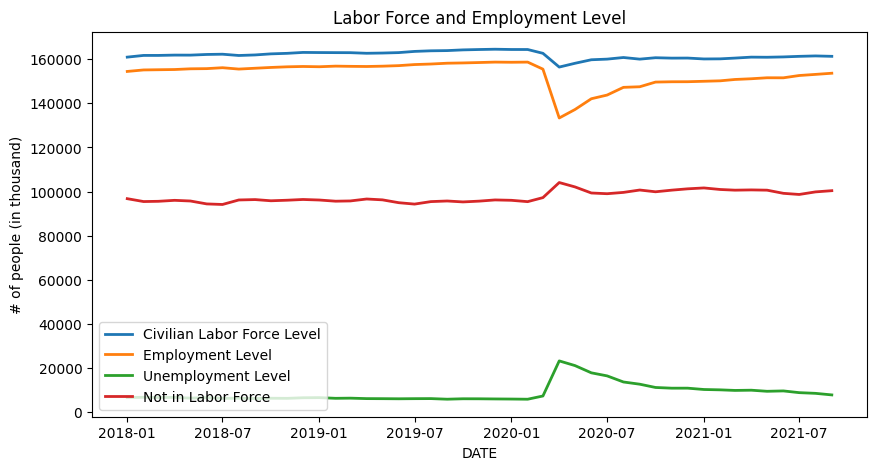

In [141]:
#Figure 3: Labor Force Trend
df2 = pd.read_csv(url_employment_level_demo)
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.date
df2 = df2.set_index('DATE')
ax = df2[['Civilian Labor Force Level', 'Employment Level', 'Unemployment Level', 'Not in Labor Force']].plot(linewidth = 2, fontsize = 10, title = 'Labor Force and Employment Level')
ax.set_ylabel ('# of people (in thousand)')
ax.legend(fontsize = 10, loc = 'lower left')


In [142]:
df2_1 = df2.iloc[25:29,:]
df2_1
print('Labor Force level change:', df2_1['Civilian Labor Force Level'][-1] - df2_1['Civilian Labor Force Level'][0])
print('EL change:', df2_1['Employment Level'][-1] - df2_1['Employment Level'][0])
print('UEL change:', df2_1['Unemployment Level'][-1] - df2_1['Unemployment Level'][0])
print('NIL change:', df2_1['Not in Labor Force'][-1] - df2_1['Not in Labor Force'][0])


Labor Force level change: -6248
EL change: -21508
UEL change: 15258
NIL change: 6679


In [163]:
#df2['Employment Level'].idxmax()

Text(0, 0.5, '# of people (in thousand)')

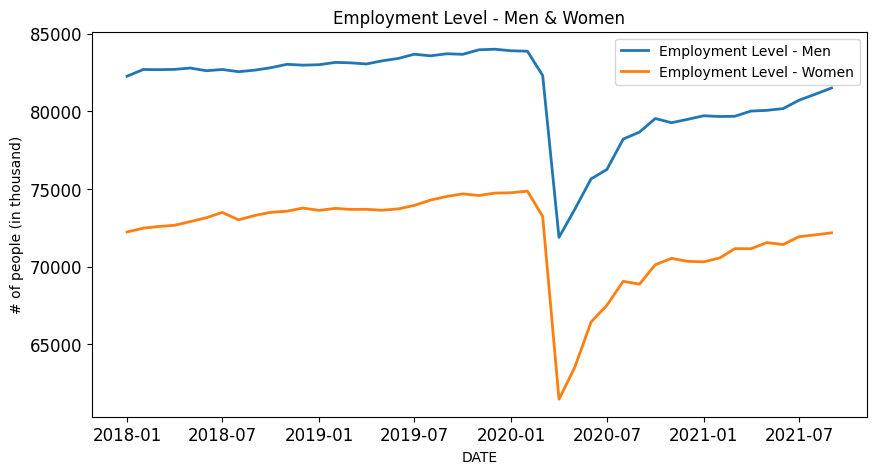

In [145]:
#Figure 4: Employment Level - Sex
ax = df2[['Employment Level - Men', 'Employment Level - Women']].plot(linewidth = 2, fontsize = 12, title = 'Employment Level - Men & Women')
ax.set_ylabel('# of people (in thousand)')

In [146]:
#data on employment - men and women
print('man gap:', df2['Employment Level - Men'].max() - df2['Employment Level - Men'].min())
print('women gap:', df2['Employment Level - Women'].max() - df2['Employment Level - Women'].min())


man gap: 12103
women gap: 13387


Unemployment Rate 14.8 2020-04-01
Unemployment Rate - Asian 14.9 2020-05-01
Unemployment Rate - White 14.1 2020-04-01
Unemployment Rate - Black or African American 16.6 2020-05-01
Unemployment Rate - Men 13.6 2020-04-01
Unemployment Rate - Women 16.1 2020-04-01


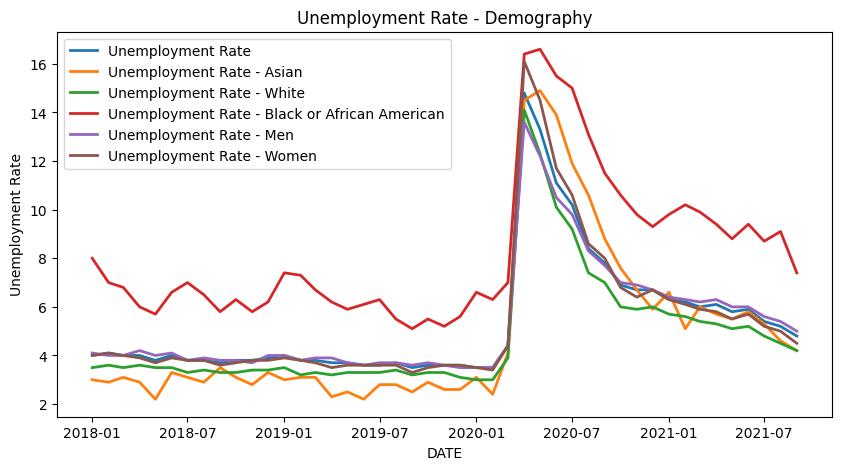

In [147]:
#Figure 5: Unemployment Rate - demographics
ax = df1_other.plot(linewidth = 2, fontsize = 10, title = 'Unemployment Rate - Demography')
ax.legend(fontsize = 10)
ax.set_ylabel('Unemployment Rate')
high_ur = []
time_high = []
columns_name = []
for i in range(len(df1_other.columns)):
    high_ur.append(df1_other.iloc[:, i].max())
    time_high.append(df1_other.iloc[:, i].idxmax())
    columns_name.append(df1_other.columns[i])
    
for i in range(len(df1_other.columns)):
    print(columns_name[i],high_ur[i], time_high[i])

Text(0, 0.5, '# of people (in thousand)')

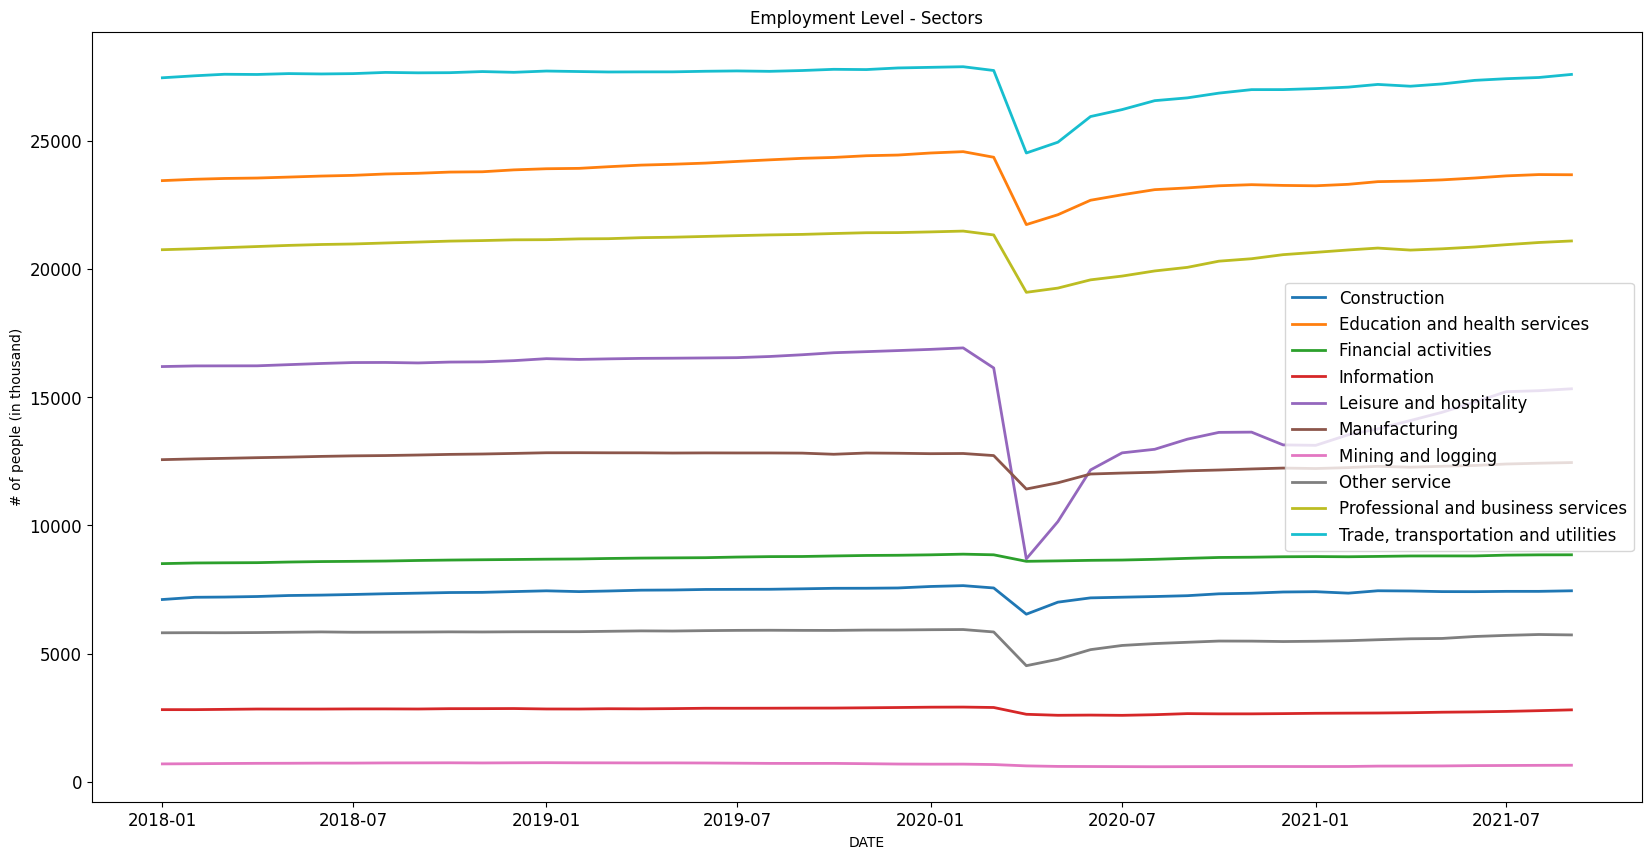

In [148]:
#Figure 6: Employment Level - Industry
df3 = pd.read_csv(url_empoyment_level_industry)
df3['DATE'] = pd.to_datetime(df3['DATE']).dt.date
df3 = df3.set_index("DATE")
plt.rcParams['figure.figsize'] = (20,10)
ax = df3.plot(linewidth = 2, fontsize = 12, title = 'Employment Level - Sectors')
ax.legend(fontsize = 12)
ax.set_ylabel('# of people (in thousand)')

In [149]:
#data on leisure and hospitality - employment level
L_max = [df3['Leisure and hospitality'].idxmax(), df3['Leisure and hospitality'].max()]
L_min = [df3['Leisure and hospitality'].idxmin(), df3['Leisure and hospitality'].min()]
L_max, L_min, L_max[1] - L_min[1]

([datetime.date(2020, 2, 1), 16915], [datetime.date(2020, 4, 1), 8691], 8224)

In [150]:
res = []
for i in df3.columns:
    res.append([i, df3[i].max()-df3[i].min()])
res

[['Construction', 1113],
 ['Education and health services', 2843],
 ['Financial activities', 369],
 ['Information', 322],
 ['Leisure and hospitality', 8224],
 ['Manufacturing', 1416],
 ['Mining and logging', 157],
 ['Other service', 1410],
 ['Professional and business services', 2387],
 ['Trade, transportation and utilities', 3363]]

In [151]:
df3['Leisure and hospitality'].idxmax()

datetime.date(2020, 2, 1)

Text(0, 0.5, 'Unemployment Rate')

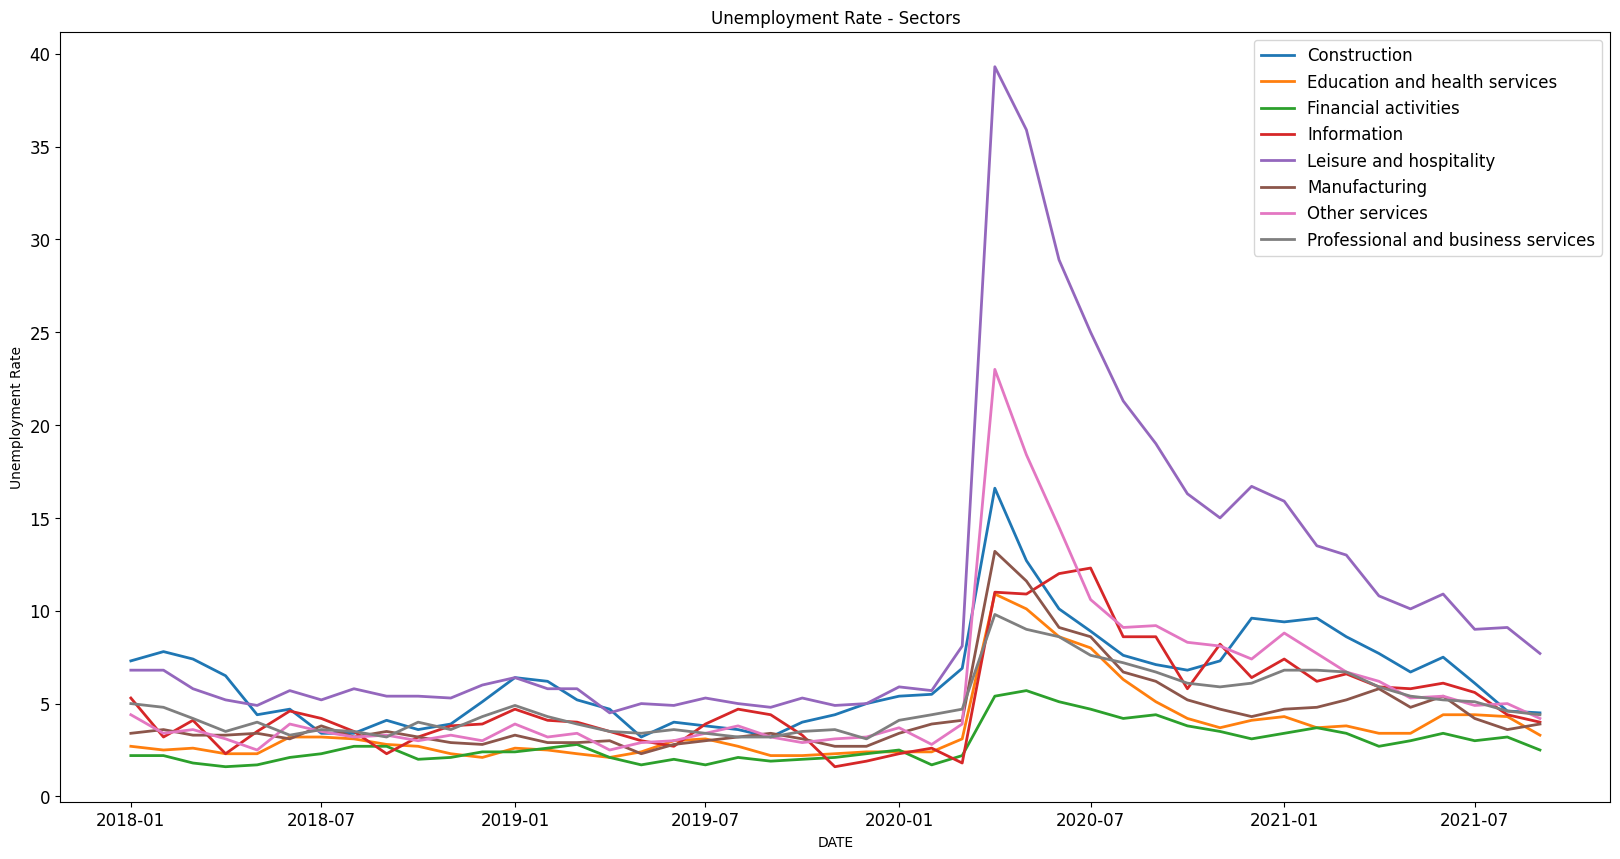

In [152]:
#Figure 7: 
df4 = pd.read_csv(url_ur_industry)
df4['DATE'] = pd.to_datetime(df4['DATE']).dt.date
df4 = df4.set_index('DATE')
ax = df4.plot(linewidth = 2, fontsize = 12, title = 'Unemployment Rate - Sectors')
ax.legend(fontsize = 12)
ax.set_ylabel('Unemployment Rate')

In [164]:
#df4.max()
#df4['Leisure and hospitality'].min()

In [153]:
res = []
for i in df4.columns:
    res.append([i, df4[i].max()-df4[i].min()])
res

[['Construction', 13.400000000000002],
 ['Education and health services', 8.8],
 ['Financial activities', 4.1],
 ['Information', 10.700000000000001],
 ['Leisure and hospitality', 34.8],
 ['Manufacturing', 10.899999999999999],
 ['Other services', 20.5],
 ['Professional and business services', 6.700000000000001]]

In [154]:
#data on leisure and hospitality - ur
L_max_r = [df4['Leisure and hospitality'].idxmax(), df4['Leisure and hospitality'].max()]
L_min_r = [df4['Leisure and hospitality'].idxmin(), df4['Leisure and hospitality'].min()]
L_max_r, L_min_r, L_max_r[1] - L_min_r[1]

([datetime.date(2020, 4, 1), 39.3], [datetime.date(2019, 4, 1), 4.5], 34.8)

In [155]:
#Getting DataSource and Appendix
#should change the path when performing following code on other computer
import os 
path = '/Users/Silence_gc.q/Desktop/dataset_AIP/'
#os.getcwd()
files = os.listdir(path)
files_xlsx = [f for f in files if f[-4:] == 'xlsx'] 
files_xlsx = sorted(files_xlsx)

series_id = []
series_title = []
for i in range(len(files_xlsx)):
    df = pd.read_excel(path + files_xlsx[i])
    a = df.iloc[:, :2].iloc[2:5, :]
    series_id.append(a.iloc[0,1])
    series_title.append(a.iloc[2,1])

dct = {'File Name': files_xlsx, 'Series ID': series_id, 'Series Title':series_title}
datasource = pd.DataFrame(dct)
pd.set_option('display.max_colwidth', None)
datasource

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,File Name,Series ID,Series Title
0,Civilian Labor Force Level.xlsx,LNS11000000,(Seas) Civilian Labor Force Level
1,Employment - Men.xlsx,LNS12000001,(Seas) Employment Level - Men
2,Employment - Women.xlsx,LNS12000002,(Seas) Employment Level - Women
3,Employment Level.xlsx,LNS12000000,(Seas) Employment Level
4,Labor Force Participation Rate.xlsx,LNS11300000,(Seas) Labor Force Participation Rate
5,Not In Labor Force.xlsx,LNS15000000,(Seas) Not in Labor Force
6,UR-All.xlsx,LNS14000000,(Seas) Unemployment Rate
7,UR-Asian.xlsx,LNS14032183,(Seas) Unemployment Rate - Asian
8,UR-Black.xlsx,LNS14000006,(Seas) Unemployment Rate - Black or African American
9,UR-Men.xlsx,LNS14000001,(Seas) Unemployment Rate - Men
